In [1]:
import tensorflow as tf
#import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
from matplotlib import pyplot

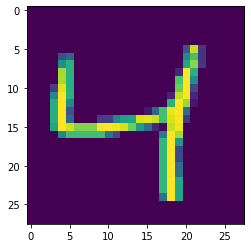

In [22]:
first_img = x_train[2]
pyplot.imshow(first_img)

In [18]:
x_train = tf.cast(x_train, dtype=tf.float32)/255.0

In [19]:
x_test = tf.cast(x_test, dtype=tf.float32)/255.0

In [20]:
y_train
# [0,0,0,0,0,1,0,0,0,0,0,0,0]
# [1,0,0,0,0,0,0,0,0,0,0,0,0]
# [0,1,0,0,0,0,0,0,0,0,0,0,0]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
x_train.shape

TensorShape([60000, 28, 28])

In [32]:

model = keras.Sequential([
    keras.Input(shape=(28,28)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
     layers.Dense(256, activation='relu'),
    layers.Dense(10),

])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer = keras.optimizers.Adam(learning_rate=0.001),
metrics =['accuracy']
)

In [36]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)
model.evaluate(x_test,y_test,batch_size=32, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 - 4s - loss: 0.1103 - accuracy: 0.9666
Epoch 2/5
60000/60000 - 4s - loss: 0.0917 - accuracy: 0.9725
Epoch 3/5
60000/60000 - 4s - loss: 0.0801 - accuracy: 0.9750
Epoch 4/5
60000/60000 - 4s - loss: 0.0684 - accuracy: 0.9785
Epoch 5/5
60000/60000 - 4s - loss: 0.0600 - accuracy: 0.9813
10000/10000 - 0s - loss: 29.0362 - accuracy: 0.9275


[29.036236029781097, 0.9275]

In [40]:
image = tf.reshape( x_test[0],shape=(1,28,28))

In [41]:
image.shape

TensorShape([1, 28, 28])

In [43]:
pred = model.predict(image)

In [46]:
pred

array([[ -703.1521 , -1119.4299 ,   658.02466,   605.8648 , -3247.3564 ,
        -1253.1243 , -4688.974  ,  1628.6969 ,  -764.7785 ,  -850.3562 ]],
      dtype=float32)

In [45]:
tf.argmax(pred,axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

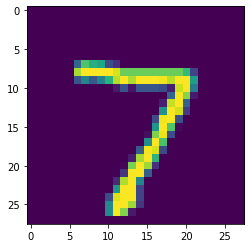

In [47]:
pyplot.imshow(x_test[0])

In [49]:
from tensorflow.keras.models  import save_model, load_model

In [51]:
save_model(model=model, filepath="./saved_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./saved_model/assets


In [52]:
mysaved_model = load_model(filepath='./saved_model')

In [53]:
pred = mysaved_model.predict(image)

In [54]:
pred

array([[ -703.1521 , -1119.4299 ,   658.02466,   605.8648 , -3247.3564 ,
        -1253.1243 , -4688.974  ,  1628.6969 ,  -764.7785 ,  -850.3562 ]],
      dtype=float32)

In [57]:
value = tf.argmax(pred, axis=1).numpy()[0]

In [58]:
value

7